# NBaIoT SOMKNN CLASSIFY

## Device 8

- Training on device 8 (using both Mirai and Gafgyt).
- Testing on device 8 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

/home/ladin/projects/research/papers/SOM-KNN-IoT_AD


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_partial, som_test, load_data_test

## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/ladin/projects/research/iot-anomaly-detection/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 8

In [8]:
train_index

8

# 1. Load data and preprocess data

In [9]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [10]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((46585, 115), (46585,)),
 ((303223, 115), (303223,)),
 ((513248, 115), (513248,)))

## Split data

In [11]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [12]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((32609, 115), (13976, 115), (32609,), (13976,))

In [13]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((212256, 115), (90967, 115), (212256,), (90967,))

In [14]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((359273, 115), (153975, 115), (359273,), (153975,))

## Set ratio

In [15]:
benign_size = data_benign_train.shape[0]
print(benign_size)

32609


In [16]:
# ratio_001 = int(0.01*benign_size)
# ratio_01 = int(0.1*benign_size)
# ratio_05 = int(0.5*benign_size)
ratio_1 = int(1.0*benign_size)
# ratio_2 = int(2.0*benign_size)
# ratio_5 = int(5.0*benign_size)

## Get train data of benign and gafgyt by ratio

In [17]:
# train 0.01
# data_gafgyt_001, _, target_gafgyt_001, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_gafgyt_01, _, target_gafgyt_01, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_gafgyt_05, _, target_gafgyt_05, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_gafgyt_2, _, target_gafgyt_2, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_gafgyt_5, _, target_gafgyt_5, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [18]:
# print(data_gafgyt_001.shape, target_gafgyt_001.shape)
# print(data_gafgyt_01.shape, target_gafgyt_01.shape)
# print(data_gafgyt_05.shape, target_gafgyt_05.shape)
print(data_gafgyt_1.shape, target_gafgyt_1.shape)
# print(data_gafgyt_2.shape, target_gafgyt_2.shape)
# print(data_gafgyt_5.shape, target_gafgyt_5.shape)

(32609, 115) (32609,)


In [19]:
# 0.01
# X_train_gafgyt_001 = np.vstack([data_benign_train, data_gafgyt_001])
# y_train_gafgyt_001 = np.hstack([target_benign_train, target_gafgyt_001])

# 0.1
# X_train_gafgyt_01 = np.vstack([data_benign_train, data_gafgyt_01])
# y_train_gafgyt_01 = np.hstack([target_benign_train, target_gafgyt_01])

# # 0.5
# X_train_gafgyt_05 = np.vstack([data_benign_train, data_gafgyt_05])
# y_train_gafgyt_05 = np.hstack([target_benign_train, target_gafgyt_05])

# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

# # 2.0
# X_train_gafgyt_2 = np.vstack([data_benign_train, data_gafgyt_2])
# y_train_gafgyt_2 = np.hstack([target_benign_train, target_gafgyt_2])

# 5.0
# X_train_gafgyt_5 = np.vstack([data_benign_train, data_gafgyt_5])
# y_train_gafgyt_5 = np.hstack([target_benign_train, target_gafgyt_5])

In [20]:
# print(X_train_gafgyt_001.shape, y_train_gafgyt_001.shape)
# print(X_train_gafgyt_01.shape, y_train_gafgyt_01.shape)
# print(X_train_gafgyt_05.shape, y_train_gafgyt_05.shape)
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)
# print(X_train_gafgyt_2.shape, y_train_gafgyt_2.shape)
# print(X_train_gafgyt_5.shape, y_train_gafgyt_5.shape)

(65218, 115) (65218,)


## Get train data of benign and Mirai by ratio

In [21]:
# train 0.01
# data_mirai_001, _, target_mirai_001, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_mirai_01, _, target_mirai_01, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_mirai_05, _, target_mirai_05, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_mirai_2, _, target_mirai_2, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_mirai_5, _, target_mirai_5, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [22]:
# print(data_mirai_001.shape, target_mirai_001.shape)
# print(data_mirai_01.shape, target_mirai_01.shape)
# print(data_mirai_05.shape, target_mirai_05.shape)
print(data_mirai_1.shape, target_mirai_1.shape)
# print(data_mirai_2.shape, target_mirai_2.shape)
# print(data_mirai_5.shape, target_mirai_5.shape)

(32609, 115) (32609,)


In [23]:
# 0.01
# X_train_mirai_001 = np.vstack([data_benign_train, data_mirai_001])
# y_train_mirai_001 = np.hstack([target_benign_train, target_mirai_001])

# 0.1
# X_train_mirai_01 = np.vstack([data_benign_train, data_mirai_01])
# y_train_mirai_01 = np.hstack([target_benign_train, target_mirai_01])

# # 0.5
# X_train_mirai_05 = np.vstack([data_benign_train, data_mirai_05])
# y_train_mirai_05 = np.hstack([target_benign_train, target_mirai_05])

# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

# # 2.0
# X_train_mirai_2 = np.vstack([data_benign_train, data_mirai_2])
# y_train_mirai_2 = np.hstack([target_benign_train, target_mirai_2])

# 5.0
# X_train_mirai_5 = np.vstack([data_benign_train, data_mirai_5])
# y_train_mirai_5 = np.hstack([target_benign_train, target_mirai_5])

In [24]:
# print(X_train_mirai_001.shape, y_train_mirai_001.shape)
# print(X_train_mirai_01.shape, y_train_mirai_01.shape)
# print(X_train_mirai_05.shape, y_train_mirai_05.shape)
print(X_train_mirai_1.shape, y_train_mirai_1.shape)
# print(X_train_mirai_2.shape, y_train_mirai_2.shape)
# print(X_train_mirai_5.shape, y_train_mirai_5.shape)

(65218, 115) (65218,)


## Get test data

### Gafgyt

In [25]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(104943, 115) (104943,)


In [26]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((13976, 115), (90967, 115), (13976,), (90967,))

## Mirai

In [27]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(167951, 115) (167951,)


In [28]:
X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [29]:
print(X_test_mirai.shape, y_test_mirai.shape)

(117565, 115) (117565,)


# 2. SOM train and test

## 2.1. Train gafgyt

## 2.1.1. Rand

In [30]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='rand')

--------------Training and testing in the same device----------------
(65218, 115) (65218,)
------------Scale data-----------------
(65218, 115) (65218,)
X_train_scaled
[[ 5.62196251e-03  8.93143853e-02  2.07415638e-03 ...  4.72802325e-18
   1.49669395e-33  0.00000000e+00]
 [ 3.52787541e-03  7.31696845e-02  3.37370979e-04 ...  2.68685022e-18
   2.30431594e-35  1.21655120e-18]
 [ 3.38457608e-03  1.16513119e-01  1.16906733e-15 ...  1.19762703e-17
  -3.80841927e-34 -5.79818262e-18]
 ...
 [ 3.38457613e-03  7.13345679e-02  7.21130490e-09 ...  9.47687480e-19
  -5.00873818e-34  0.00000000e+00]
 [ 3.38457627e-03  7.13345809e-02  2.48263018e-08 ...  9.47687480e-19
   4.81609440e-34  0.00000000e+00]
 [ 3.38457628e-03  7.13345816e-02  2.58130366e-08 ...  5.51949851e-18
  -1.63006272e-33 -4.44645907e-17]]
---------Normalize data--------------
(65218, 115) (65218,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

/home/ladin/projects/research/papers/SOM-KNN-IoT_AD/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1 * pc[pc_order[0]] + c2 * pc[pc_order[1]]


Perform SOM (turned) train random
0.5
Total train time: 416.4323875904083


### Test on the same device

#### Test on gafgyt

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.965     0.987     0.976     13976
           2      0.998     0.994     0.996     90967

    accuracy                          0.993    104943
   macro avg      0.981     0.991     0.986    104943
weighted avg      0.994     0.993     0.993    104943



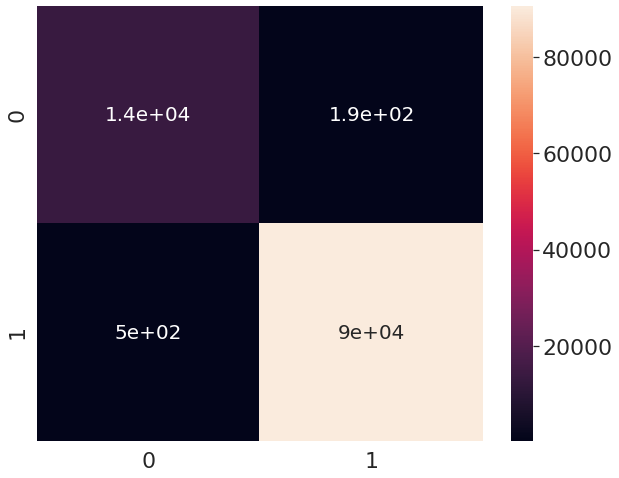

AUC score:  0.9905039489558947


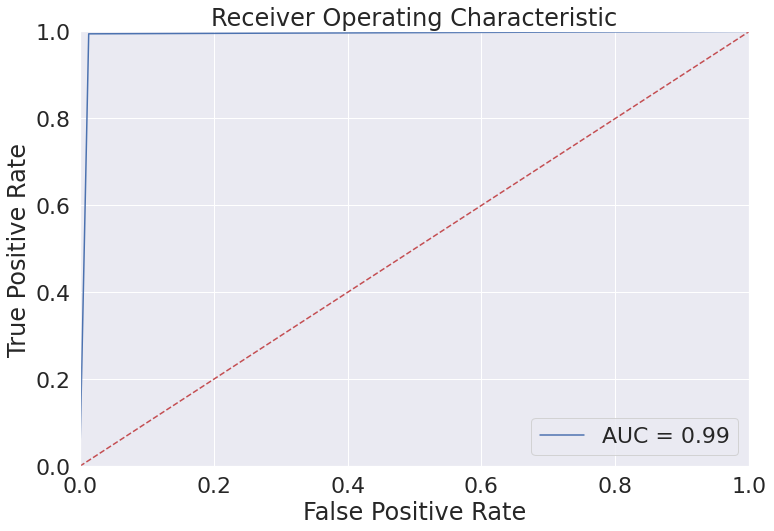

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [31]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.966     0.986     0.976     13976
           2      0.998     0.995     0.996     90967

    accuracy                          0.994    104943
   macro avg      0.982     0.991     0.986    104943
weighted avg      0.994     0.994     0.994    104943



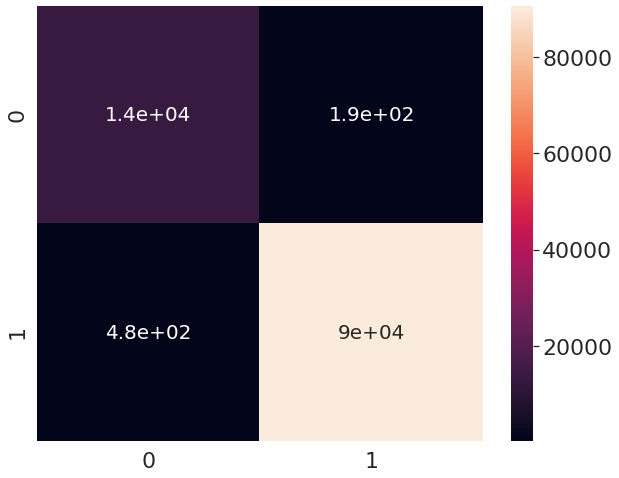

AUC score:  0.9905120485832094


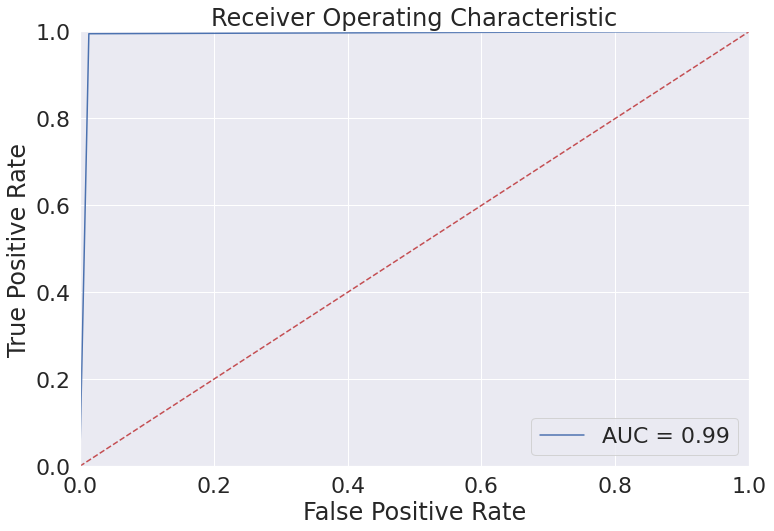

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [32]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.115     0.986     0.205      9821
           2      0.996     0.305     0.467    107744

    accuracy                          0.362    117565
   macro avg      0.555     0.646     0.336    117565
weighted avg      0.922     0.362     0.446    117565



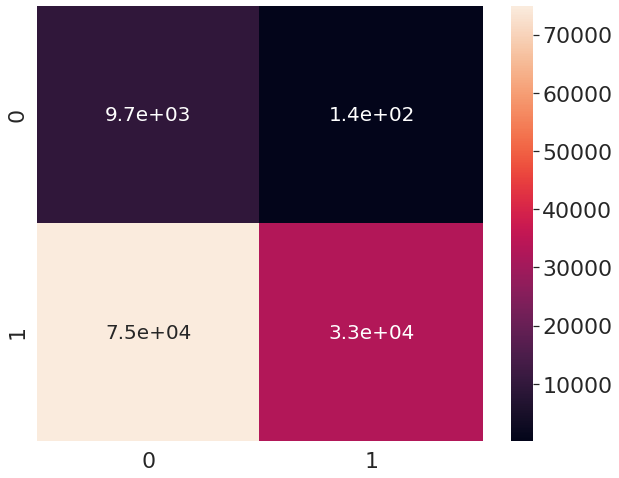

AUC score:  0.6457620579368619


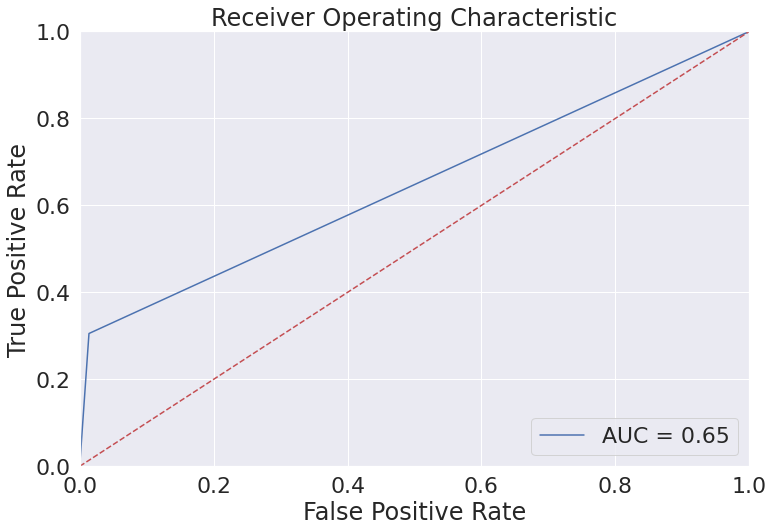

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [33]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.119     0.986     0.212      9821
           2      0.996     0.334     0.500    107744

    accuracy                          0.388    117565
   macro avg      0.558     0.660     0.356    117565
weighted avg      0.923     0.388     0.476    117565



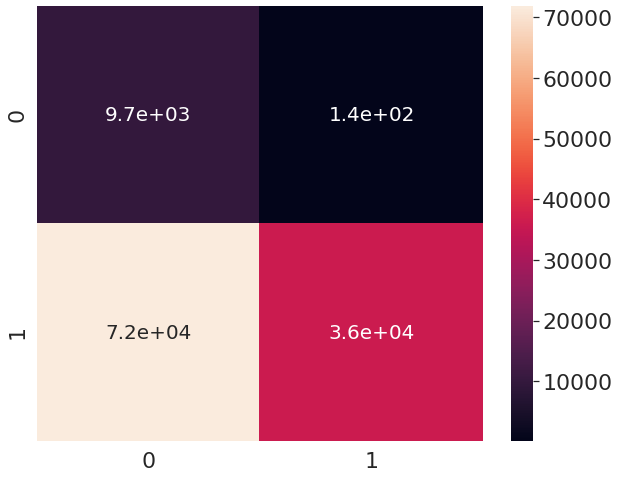

AUC score:  0.659930307070364


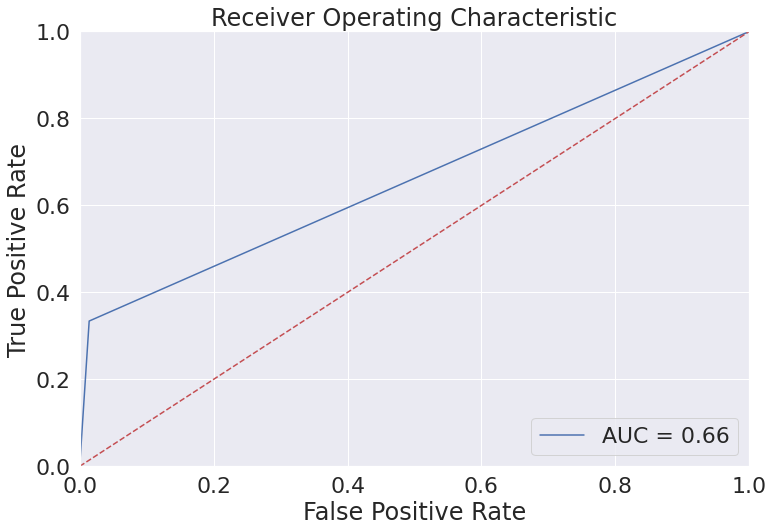

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [34]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.1.2. TPE

### Train

In [35]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='tpe')

--------------Training and testing in the same device----------------
(65218, 115) (65218,)
------------Scale data-----------------
(65218, 115) (65218,)
X_train_scaled
[[ 5.62196251e-03  8.93143853e-02  2.07415638e-03 ...  4.72802325e-18
   1.49669395e-33  0.00000000e+00]
 [ 3.52787541e-03  7.31696845e-02  3.37370979e-04 ...  2.68685022e-18
   2.30431594e-35  1.21655120e-18]
 [ 3.38457608e-03  1.16513119e-01  1.16906733e-15 ...  1.19762703e-17
  -3.80841927e-34 -5.79818262e-18]
 ...
 [ 3.38457613e-03  7.13345679e-02  7.21130490e-09 ...  9.47687480e-19
  -5.00873818e-34  0.00000000e+00]
 [ 3.38457627e-03  7.13345809e-02  2.48263018e-08 ...  9.47687480e-19
   4.81609440e-34  0.00000000e+00]
 [ 3.38457628e-03  7.13345816e-02  2.58130366e-08 ...  5.51949851e-18
  -1.63006272e-33 -4.44645907e-17]]
---------Normalize data--------------
(65218, 115) (65218,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

/home/ladin/projects/research/papers/SOM-KNN-IoT_AD/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1 * pc[pc_order[0]] + c2 * pc[pc_order[1]]


0.5
Total train time: 286.2695915699005


### Test on first device

#### Test on gafgyt

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.936     0.995     0.965     13976
           2      0.999     0.990     0.994     90967

    accuracy                          0.990    104943
   macro avg      0.968     0.992     0.980    104943
weighted avg      0.991     0.990     0.990    104943



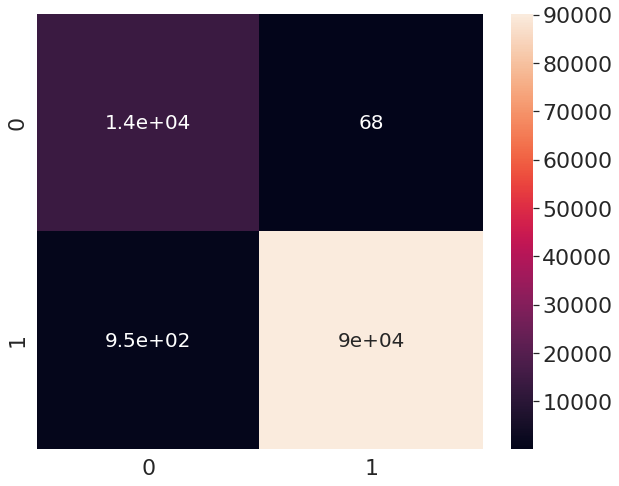

AUC score:  0.9923675703579681


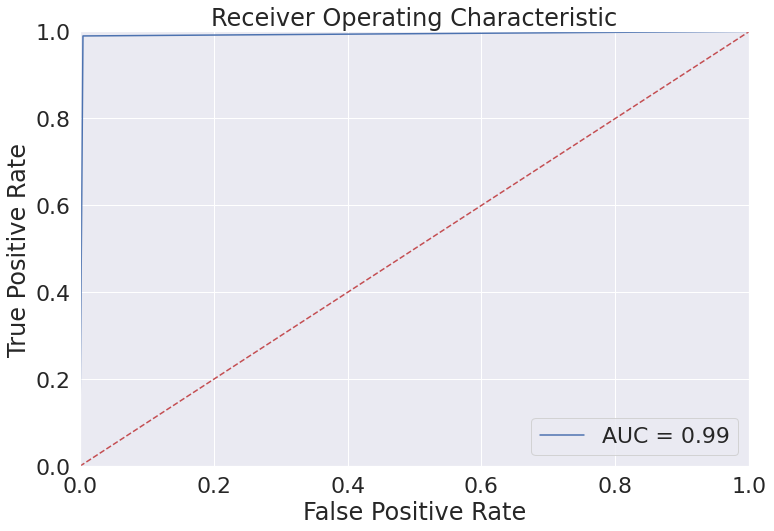

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [36]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.937     0.995     0.965     13976
           2      0.999     0.990     0.994     90967

    accuracy                          0.990    104943
   macro avg      0.968     0.992     0.980    104943
weighted avg      0.991     0.990     0.990    104943



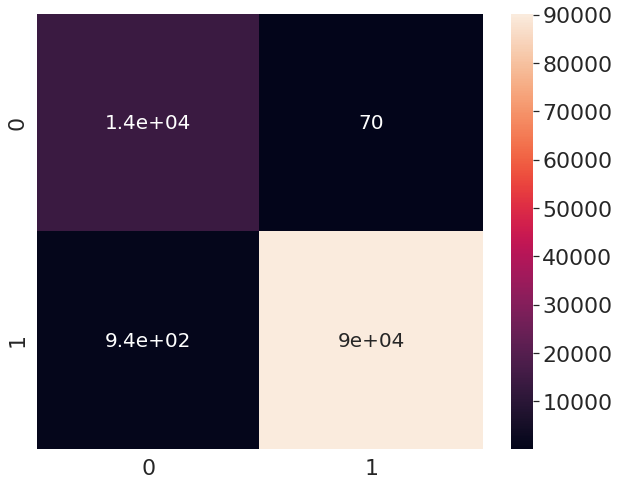

AUC score:  0.9923289981196688


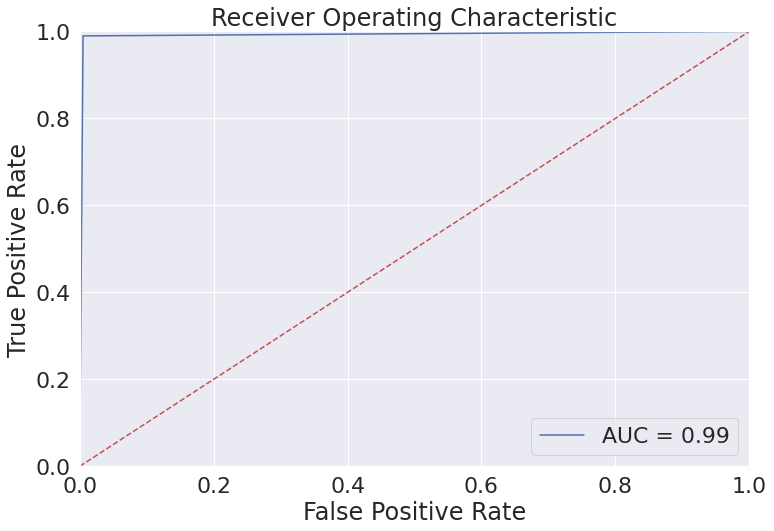

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [37]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.118     0.995     0.210      9821
           2      0.998     0.319     0.484    107744

    accuracy                          0.376    117565
   macro avg      0.558     0.657     0.347    117565
weighted avg      0.925     0.376     0.461    117565



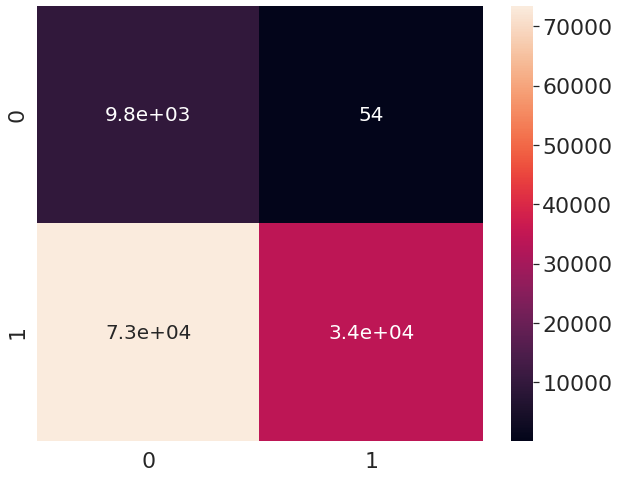

AUC score:  0.6568698862444408


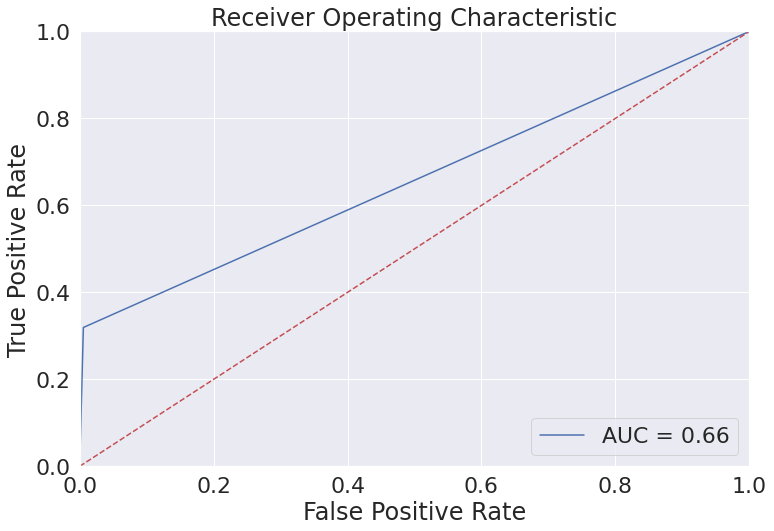

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [38]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.119     0.994     0.212      9821
           2      0.998     0.328     0.494    107744

    accuracy                          0.384    117565
   macro avg      0.559     0.661     0.353    117565
weighted avg      0.925     0.384     0.470    117565



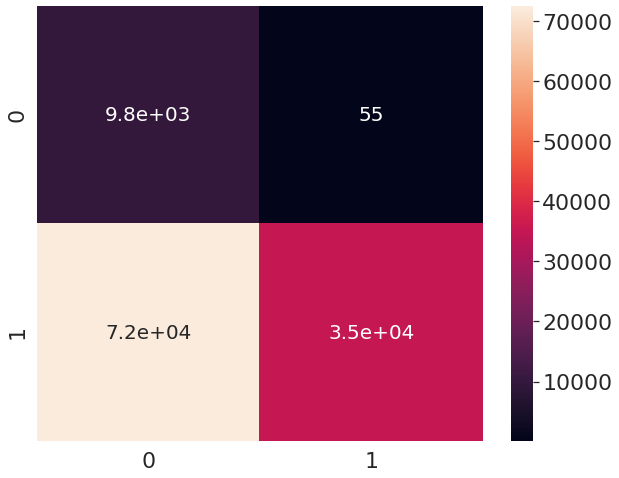

AUC score:  0.6611765261644984


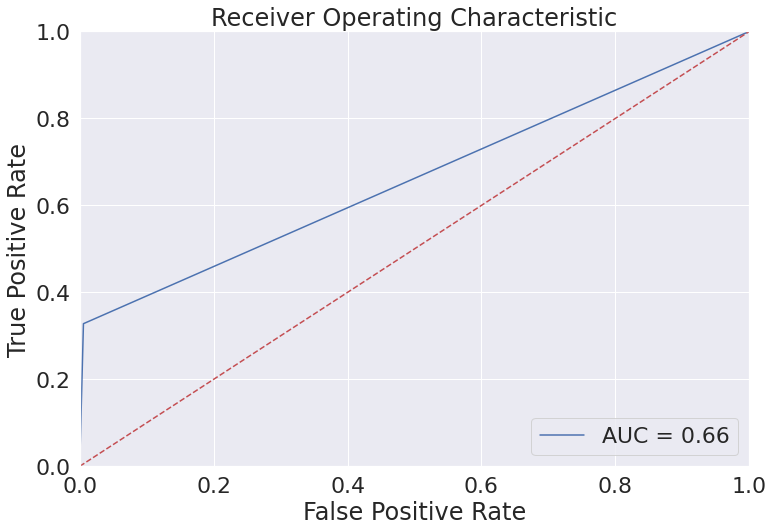

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [39]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.3. ATPE

### Train

In [40]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='atpe')

--------------Training and testing in the same device----------------
(65218, 115) (65218,)
------------Scale data-----------------
(65218, 115) (65218,)
X_train_scaled
[[ 5.62196251e-03  8.93143853e-02  2.07415638e-03 ...  4.72802325e-18
   1.49669395e-33  0.00000000e+00]
 [ 3.52787541e-03  7.31696845e-02  3.37370979e-04 ...  2.68685022e-18
   2.30431594e-35  1.21655120e-18]
 [ 3.38457608e-03  1.16513119e-01  1.16906733e-15 ...  1.19762703e-17
  -3.80841927e-34 -5.79818262e-18]
 ...
 [ 3.38457613e-03  7.13345679e-02  7.21130490e-09 ...  9.47687480e-19
  -5.00873818e-34  0.00000000e+00]
 [ 3.38457627e-03  7.13345809e-02  2.48263018e-08 ...  9.47687480e-19
   4.81609440e-34  0.00000000e+00]
 [ 3.38457628e-03  7.13345816e-02  2.58130366e-08 ...  5.51949851e-18
  -1.63006272e-33 -4.44645907e-17]]
---------Normalize data--------------
(65218, 115) (65218,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.970     0.983     0.976     13976
           2      0.997     0.995     0.996     90967

    accuracy                          0.994    104943
   macro avg      0.984     0.989     0.986    104943
weighted avg      0.994     0.994     0.994    104943



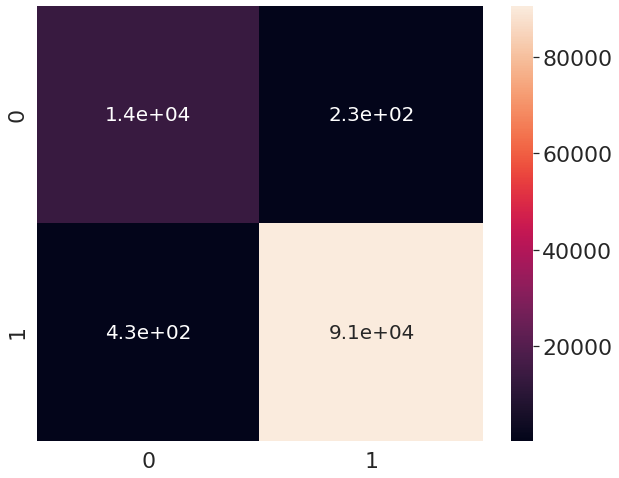

AUC score:  0.9893007871716112


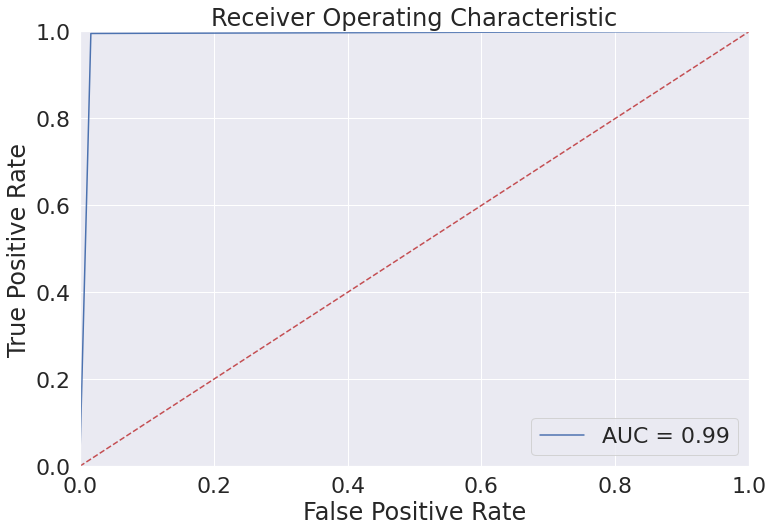

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [41]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.970     0.983     0.977     13976
           2      0.997     0.995     0.996     90967

    accuracy                          0.994    104943
   macro avg      0.984     0.989     0.986    104943
weighted avg      0.994     0.994     0.994    104943



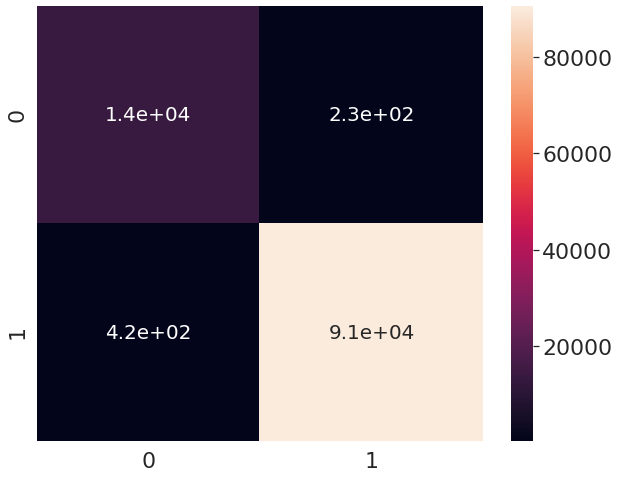

AUC score:  0.9893282696652627


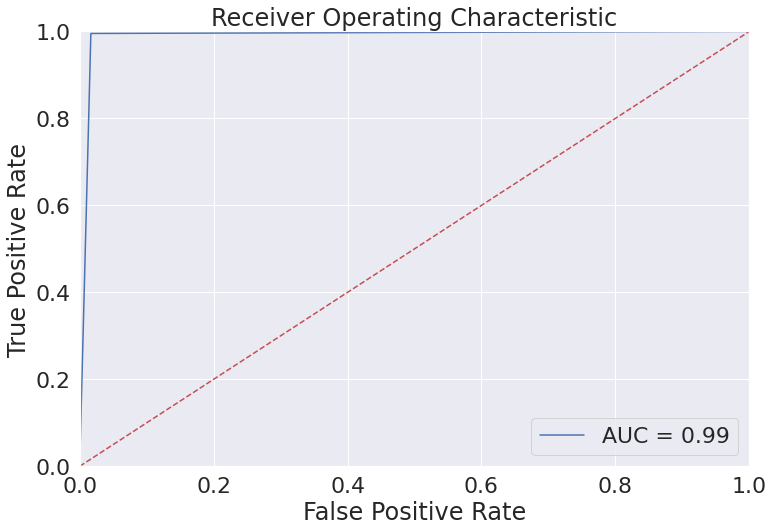

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.119     0.983     0.213      9821
           2      0.995     0.339     0.505    107744

    accuracy                          0.392    117565
   macro avg      0.557     0.661     0.359    117565
weighted avg      0.922     0.392     0.481    117565



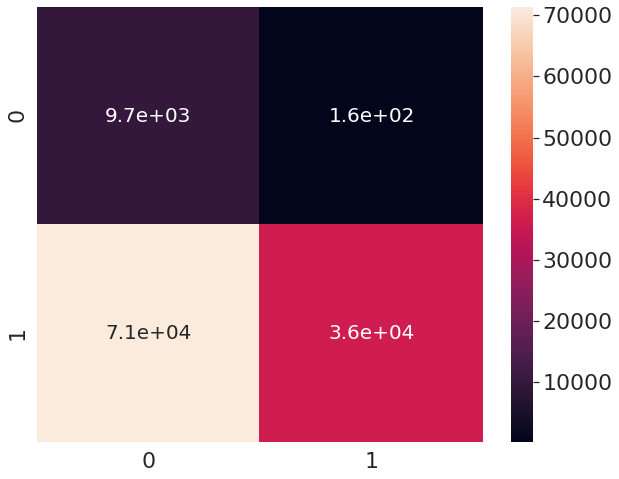

AUC score:  0.6608619589508756


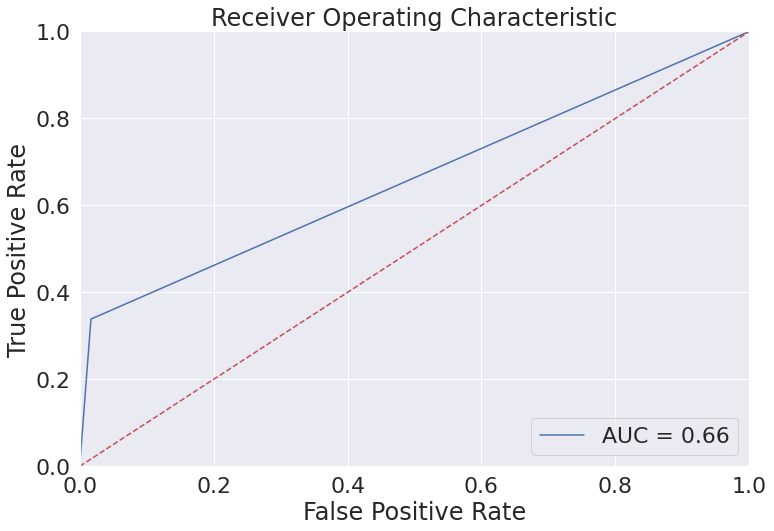

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [43]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.119     0.983     0.213      9821
           2      0.995     0.339     0.505    107744

    accuracy                          0.392    117565
   macro avg      0.557     0.661     0.359    117565
weighted avg      0.922     0.392     0.481    117565



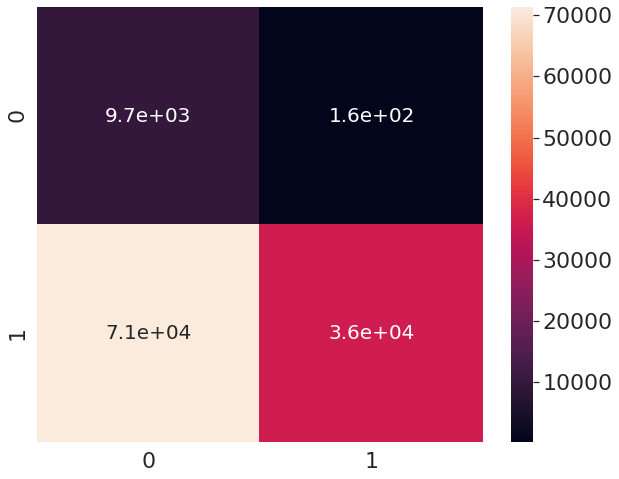

AUC score:  0.6608619589508756


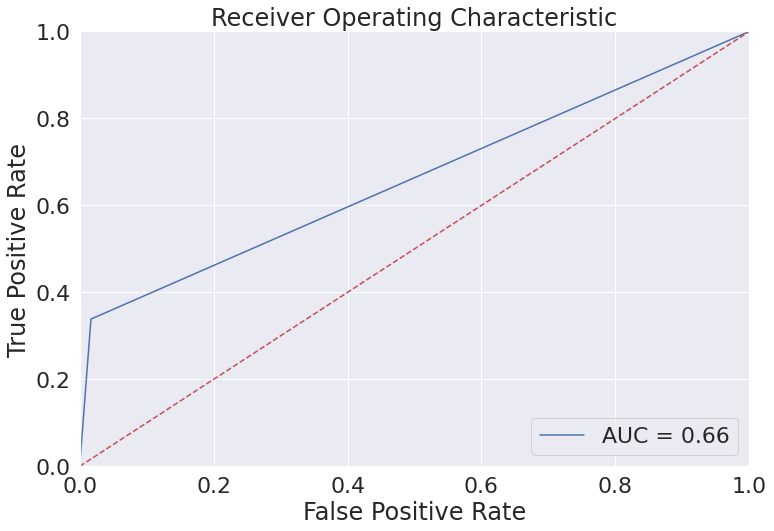

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [44]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.4. Anneal

### Train

In [45]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='anneal')

--------------Training and testing in the same device----------------
(65218, 115) (65218,)
------------Scale data-----------------
(65218, 115) (65218,)
X_train_scaled
[[ 5.62196251e-03  8.93143853e-02  2.07415638e-03 ...  4.72802325e-18
   1.49669395e-33  0.00000000e+00]
 [ 3.52787541e-03  7.31696845e-02  3.37370979e-04 ...  2.68685022e-18
   2.30431594e-35  1.21655120e-18]
 [ 3.38457608e-03  1.16513119e-01  1.16906733e-15 ...  1.19762703e-17
  -3.80841927e-34 -5.79818262e-18]
 ...
 [ 3.38457613e-03  7.13345679e-02  7.21130490e-09 ...  9.47687480e-19
  -5.00873818e-34  0.00000000e+00]
 [ 3.38457627e-03  7.13345809e-02  2.48263018e-08 ...  9.47687480e-19
   4.81609440e-34  0.00000000e+00]
 [ 3.38457628e-03  7.13345816e-02  2.58130366e-08 ...  5.51949851e-18
  -1.63006272e-33 -4.44645907e-17]]
---------Normalize data--------------
(65218, 115) (65218,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.979     0.993     0.986     13976
           2      0.999     0.997     0.998     90967

    accuracy                          0.996    104943
   macro avg      0.989     0.995     0.992    104943
weighted avg      0.996     0.996     0.996    104943



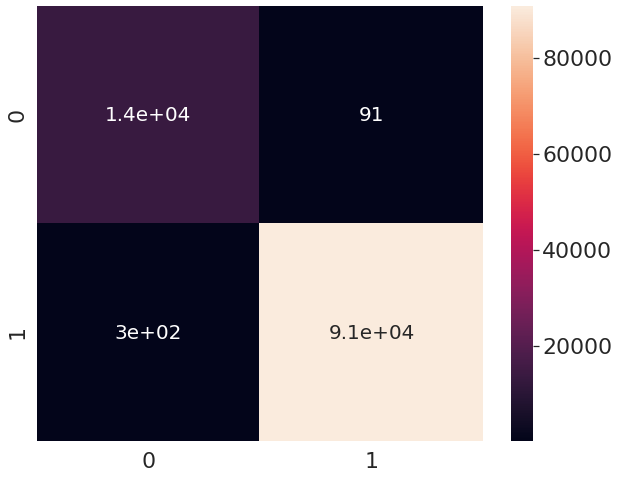

AUC score:  0.9951064623823748


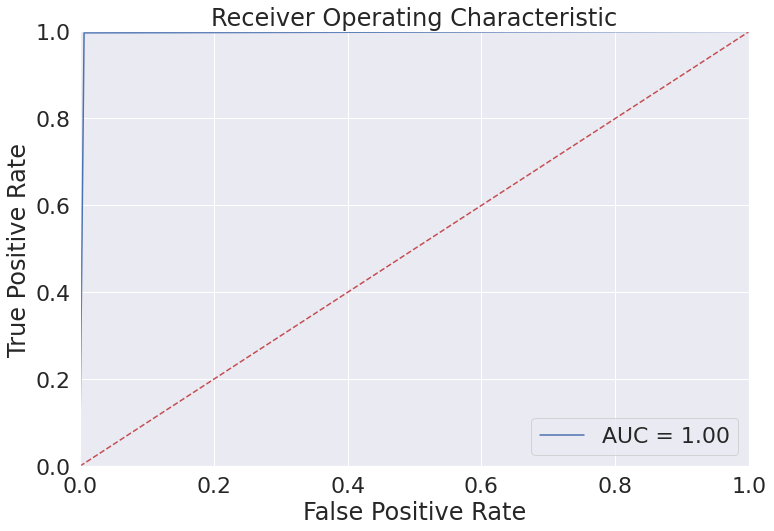

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.979     0.993     0.986     13976
           2      0.999     0.997     0.998     90967

    accuracy                          0.996    104943
   macro avg      0.989     0.995     0.992    104943
weighted avg      0.996     0.996     0.996    104943



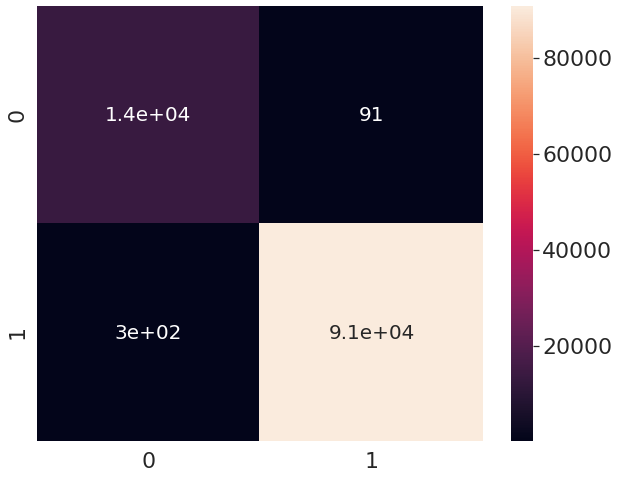

AUC score:  0.9951119588811052


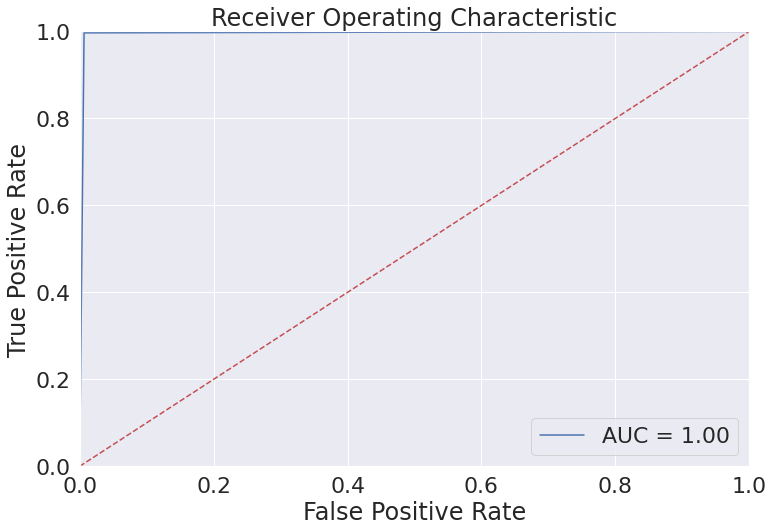

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [47]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.120     0.993     0.214      9821
           2      0.998     0.335     0.502    107744

    accuracy                          0.390    117565
   macro avg      0.559     0.664     0.358    117565
weighted avg      0.925     0.390     0.478    117565



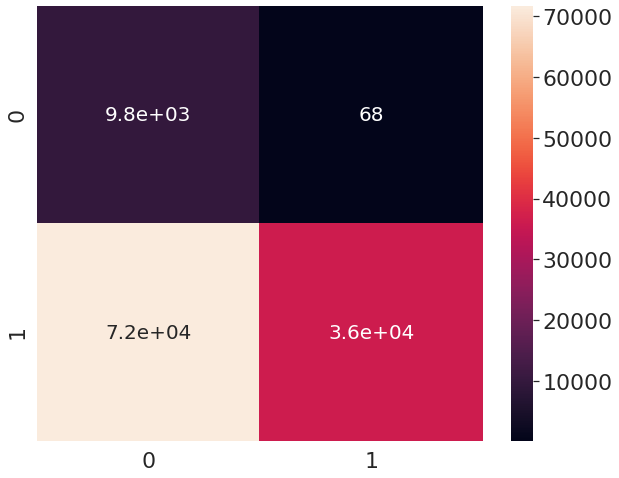

AUC score:  0.6642225421849441


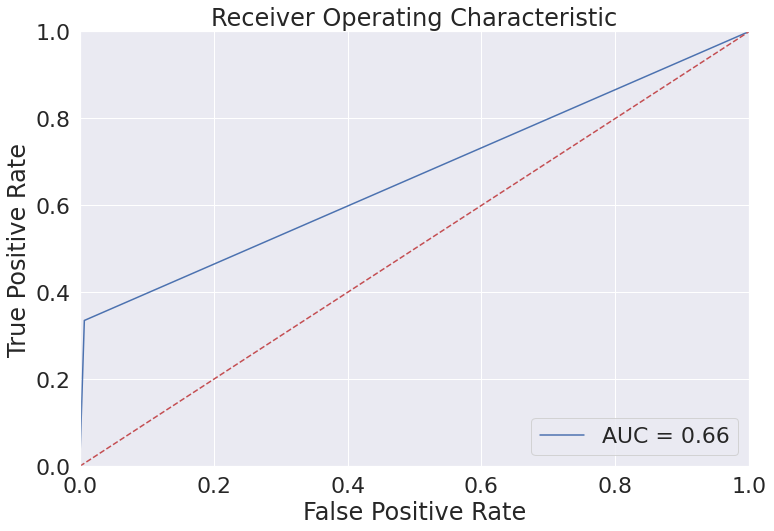

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [48]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.120     0.993     0.214      9821
           2      0.998     0.335     0.502    107744

    accuracy                          0.390    117565
   macro avg      0.559     0.664     0.358    117565
weighted avg      0.925     0.390     0.478    117565



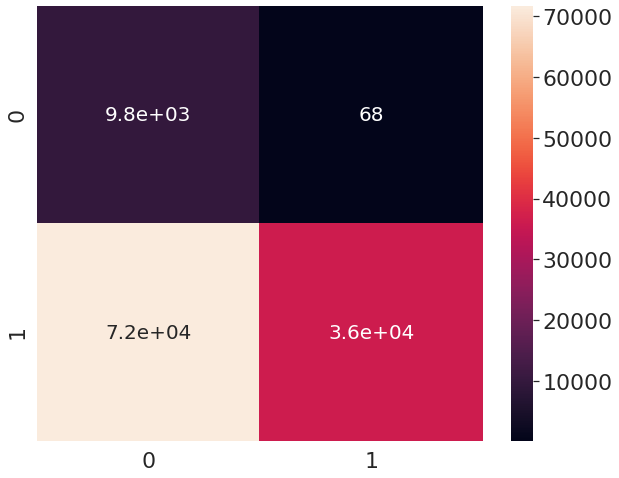

AUC score:  0.664236464073866


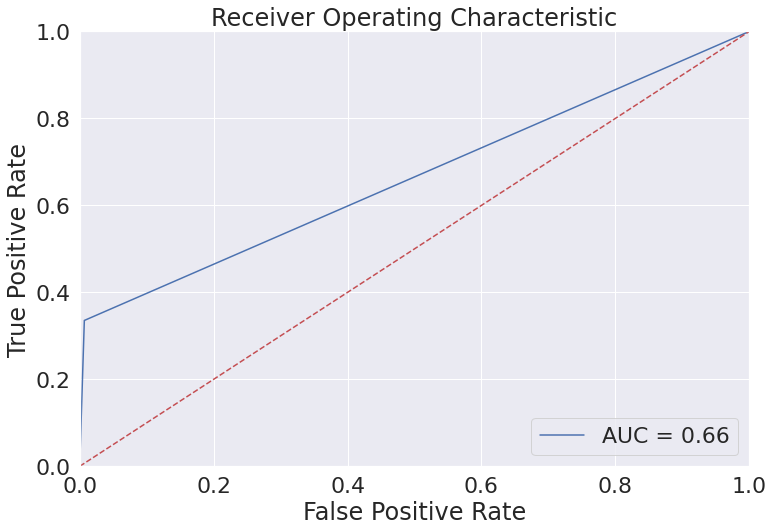

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2. Train Mirai

## 2.2.1. RAND

In [50]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='rand')

--------------Training and testing in the same device----------------
(65218, 115) (65218,)
------------Scale data-----------------
(65218, 115) (65218,)
X_train_scaled
[[ 3.88939801e-03  1.33696854e-01  5.40499912e-03 ...  4.72802325e-18
   1.59755553e-33  0.00000000e+00]
 [ 2.44066224e-03  1.09529463e-01  8.79147717e-04 ...  2.68685022e-18
   2.45960282e-35  1.21655120e-18]
 [ 2.34152459e-03  1.74411294e-01  3.04644720e-15 ...  1.19762703e-17
  -4.06506704e-34 -5.79818262e-18]
 ...
 [ 2.34152463e-03  1.06782433e-01  1.87917830e-08 ...  9.47687480e-19
  -5.34627495e-34  0.00000000e+00]
 [ 2.34152472e-03  1.06782452e-01  6.46943215e-08 ...  9.47687480e-19
   5.14064899e-34  0.00000000e+00]
 [ 2.34152473e-03  1.06782453e-01  6.72656323e-08 ...  5.51949851e-18
  -1.73991196e-33 -4.44645907e-17]]
---------Normalize data--------------
(65218, 115) (65218,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.171     0.970     0.291     13976
           2      0.984     0.279     0.435     90967

    accuracy                          0.371    104943
   macro avg      0.578     0.625     0.363    104943
weighted avg      0.876     0.371     0.416    104943



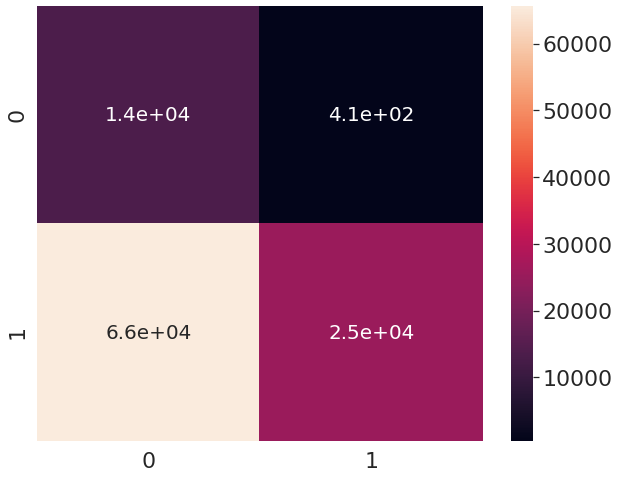

AUC score:  0.6248247456167215


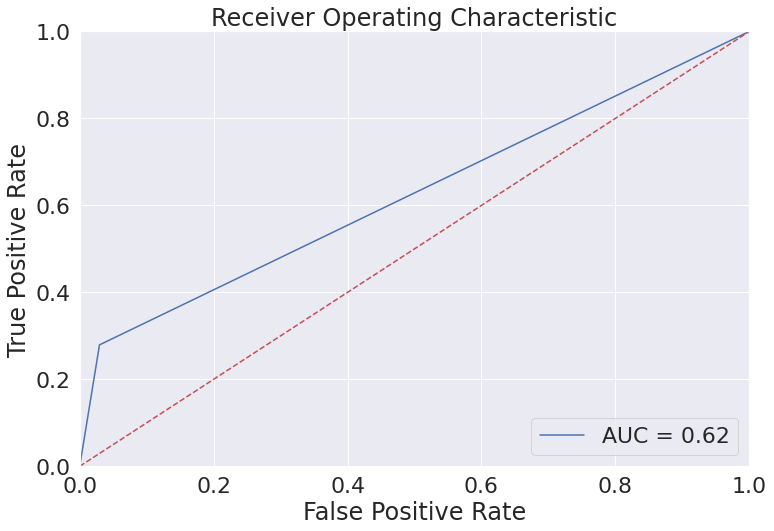

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [51]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.172     0.970     0.292     13976
           2      0.984     0.280     0.436     90967

    accuracy                          0.372    104943
   macro avg      0.578     0.625     0.364    104943
weighted avg      0.876     0.372     0.417    104943



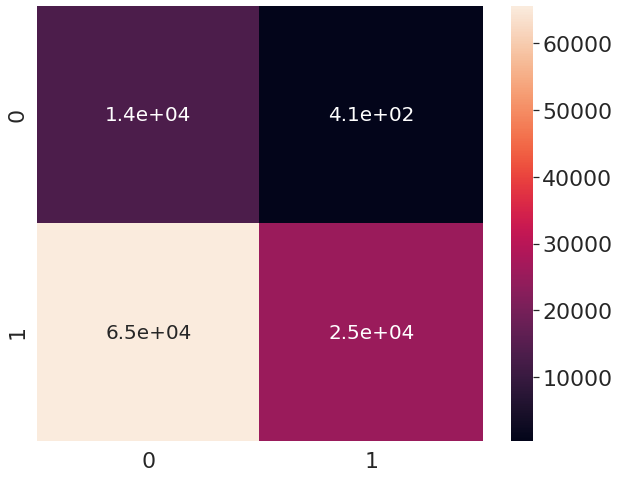

AUC score:  0.6252561723934572


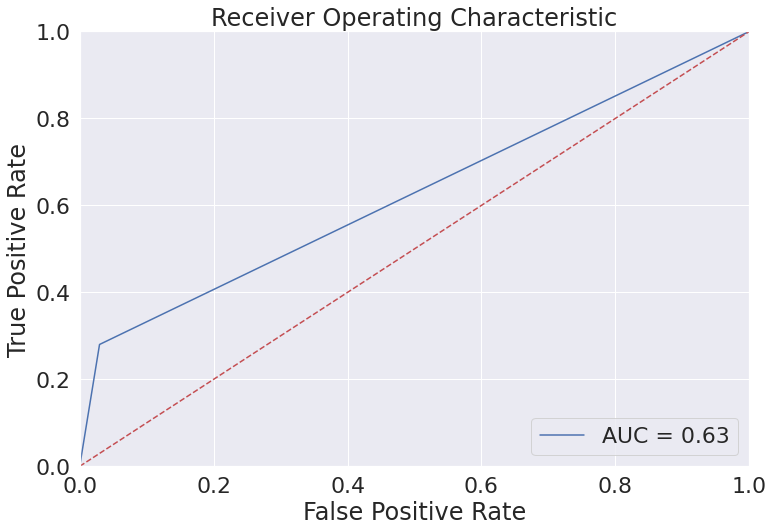

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [52]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.985     0.971     0.978      9821
           2      0.997     0.999     0.998    107744

    accuracy                          0.996    117565
   macro avg      0.991     0.985     0.988    117565
weighted avg      0.996     0.996     0.996    117565



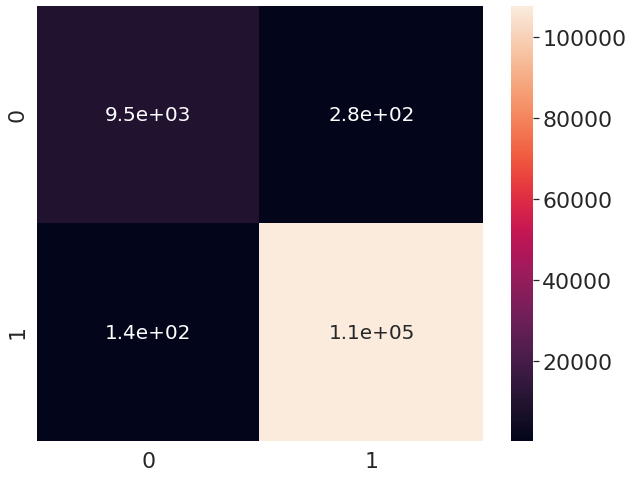

AUC score:  0.9849701185789034


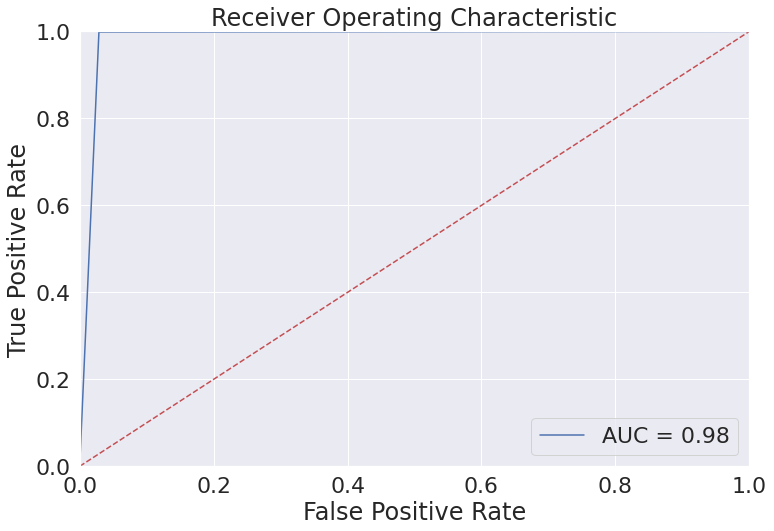

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [53]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.986     0.971     0.979      9821
           2      0.997     0.999     0.998    107744

    accuracy                          0.996    117565
   macro avg      0.992     0.985     0.988    117565
weighted avg      0.996     0.996     0.996    117565



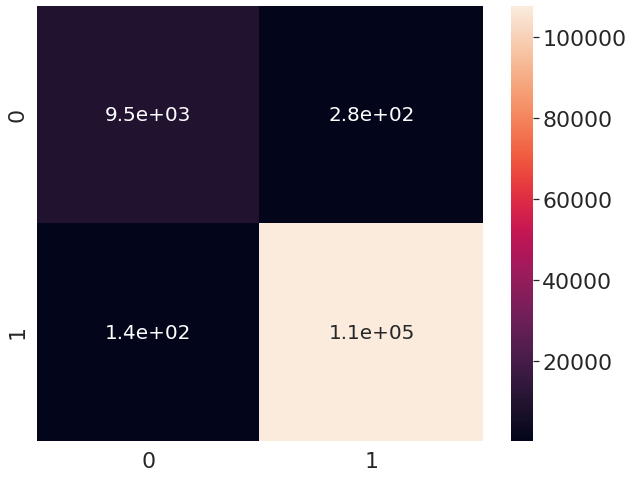

AUC score:  0.984965613562816


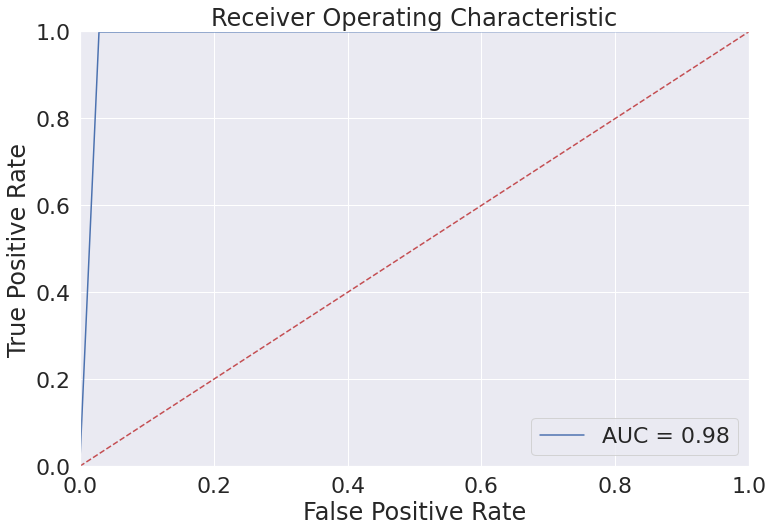

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [54]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2.2. TPE

### Train

In [55]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='tpe')

--------------Training and testing in the same device----------------
(65218, 115) (65218,)
------------Scale data-----------------
(65218, 115) (65218,)
X_train_scaled
[[ 3.88939801e-03  1.33696854e-01  5.40499912e-03 ...  4.72802325e-18
   1.59755553e-33  0.00000000e+00]
 [ 2.44066224e-03  1.09529463e-01  8.79147717e-04 ...  2.68685022e-18
   2.45960282e-35  1.21655120e-18]
 [ 2.34152459e-03  1.74411294e-01  3.04644720e-15 ...  1.19762703e-17
  -4.06506704e-34 -5.79818262e-18]
 ...
 [ 2.34152463e-03  1.06782433e-01  1.87917830e-08 ...  9.47687480e-19
  -5.34627495e-34  0.00000000e+00]
 [ 2.34152472e-03  1.06782452e-01  6.46943215e-08 ...  9.47687480e-19
   5.14064899e-34  0.00000000e+00]
 [ 2.34152473e-03  1.06782453e-01  6.72656323e-08 ...  5.51949851e-18
  -1.73991196e-33 -4.44645907e-17]]
---------Normalize data--------------
(65218, 115) (65218,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.186     0.996     0.313     13976
           2      0.998     0.329     0.495     90967

    accuracy                          0.418    104943
   macro avg      0.592     0.663     0.404    104943
weighted avg      0.890     0.418     0.471    104943



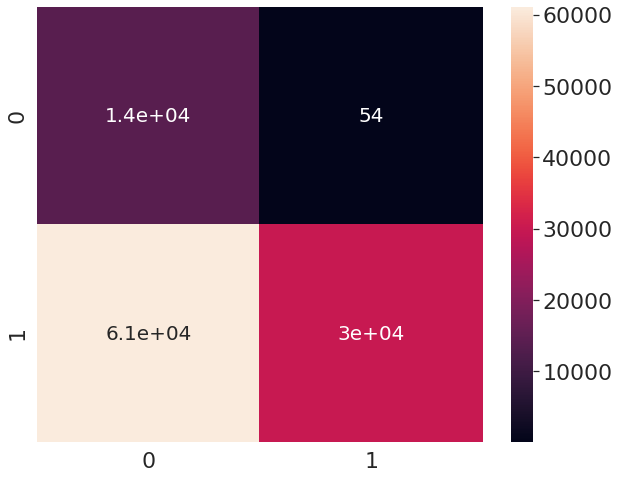

AUC score:  0.6627267292354688


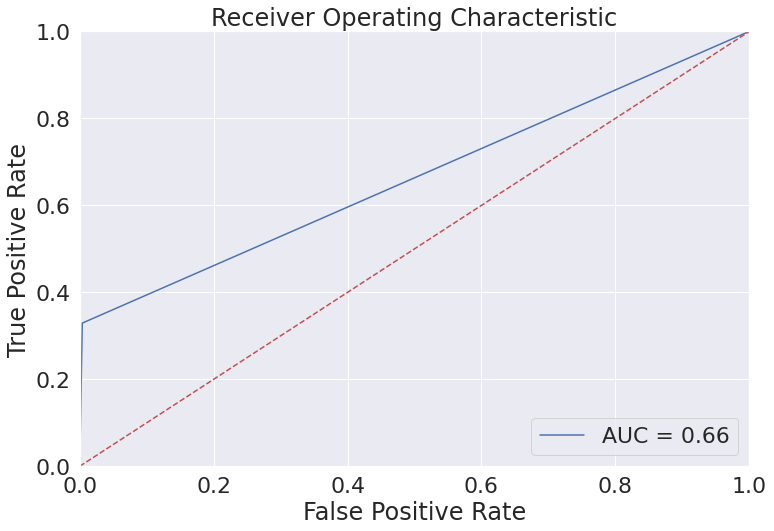

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [56]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.186     0.996     0.313     13976
           2      0.998     0.330     0.496     90967

    accuracy                          0.419    104943
   macro avg      0.592     0.663     0.405    104943
weighted avg      0.890     0.419     0.472    104943



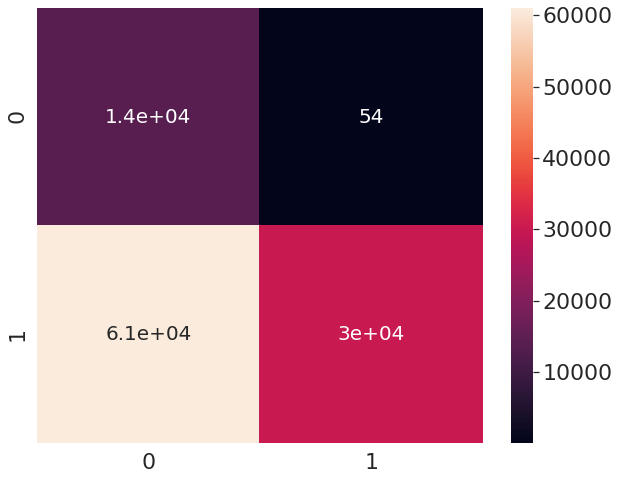

AUC score:  0.6631059876478603


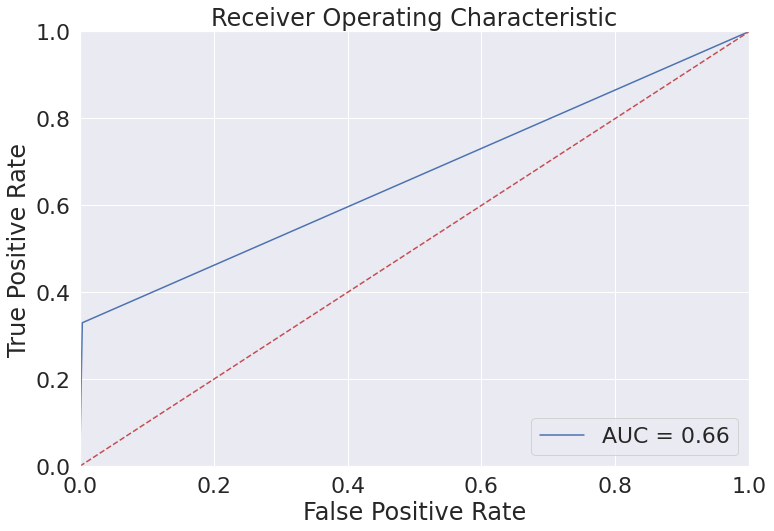

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [57]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.971     0.996     0.983      9821
           2      1.000     0.997     0.998    107744

    accuracy                          0.997    117565
   macro avg      0.985     0.997     0.991    117565
weighted avg      0.997     0.997     0.997    117565



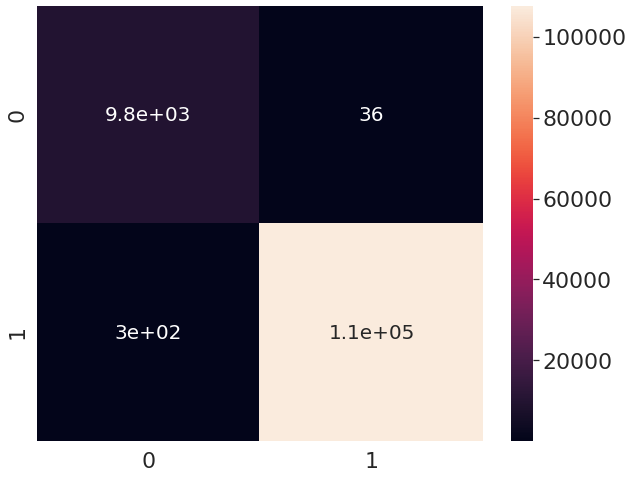

AUC score:  0.9967889257469621


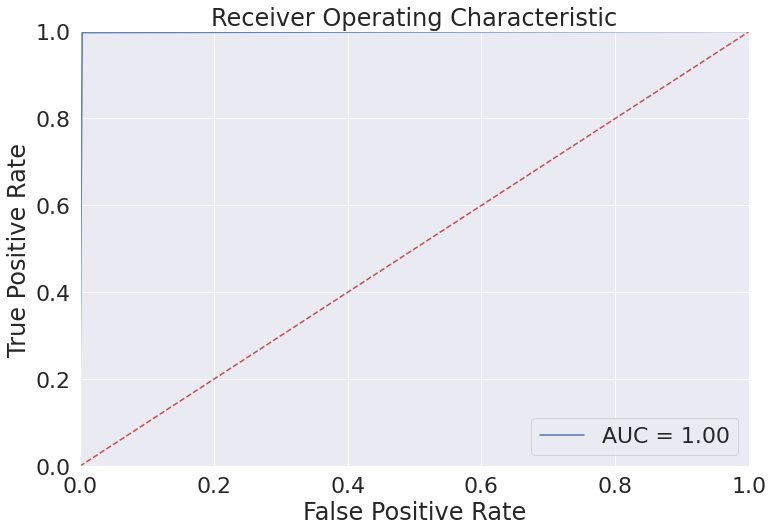

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [58]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.971     0.996     0.984      9821
           2      1.000     0.997     0.998    107744

    accuracy                          0.997    117565
   macro avg      0.985     0.997     0.991    117565
weighted avg      0.997     0.997     0.997    117565



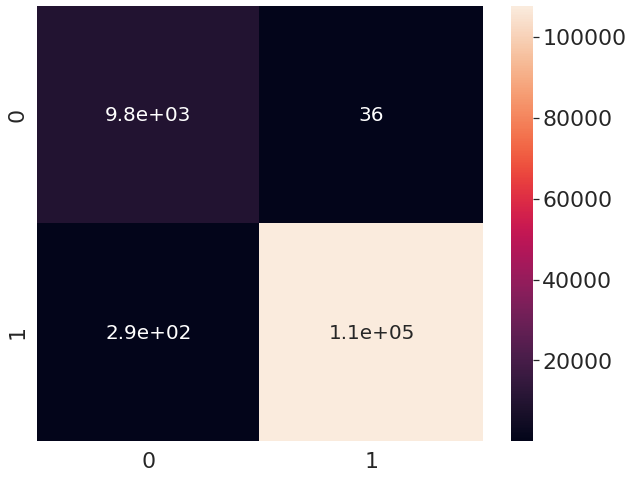

AUC score:  0.9968121288951651


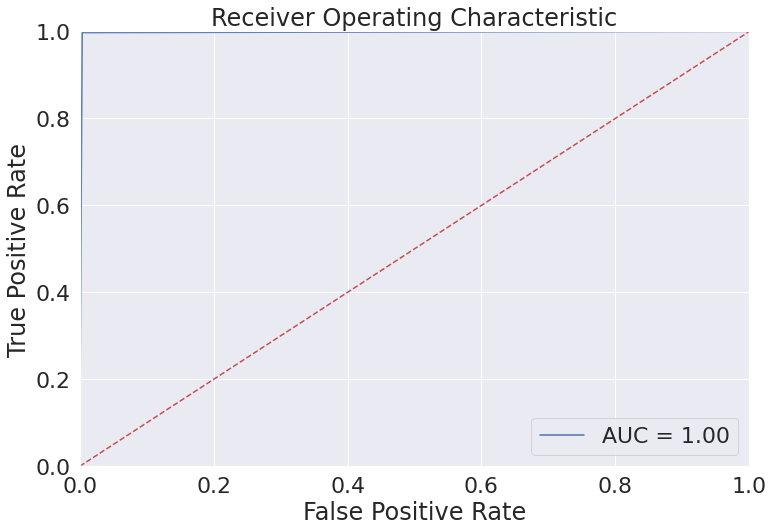

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [59]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.3. ATPE

### Train

In [60]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='atpe')

--------------Training and testing in the same device----------------
(65218, 115) (65218,)
------------Scale data-----------------
(65218, 115) (65218,)
X_train_scaled
[[ 3.88939801e-03  1.33696854e-01  5.40499912e-03 ...  4.72802325e-18
   1.59755553e-33  0.00000000e+00]
 [ 2.44066224e-03  1.09529463e-01  8.79147717e-04 ...  2.68685022e-18
   2.45960282e-35  1.21655120e-18]
 [ 2.34152459e-03  1.74411294e-01  3.04644720e-15 ...  1.19762703e-17
  -4.06506704e-34 -5.79818262e-18]
 ...
 [ 2.34152463e-03  1.06782433e-01  1.87917830e-08 ...  9.47687480e-19
  -5.34627495e-34  0.00000000e+00]
 [ 2.34152472e-03  1.06782452e-01  6.46943215e-08 ...  9.47687480e-19
   5.14064899e-34  0.00000000e+00]
 [ 2.34152473e-03  1.06782453e-01  6.72656323e-08 ...  5.51949851e-18
  -1.73991196e-33 -4.44645907e-17]]
---------Normalize data--------------
(65218, 115) (65218,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.175     0.989     0.298     13976
           2      0.994     0.284     0.442     90967

    accuracy                          0.378    104943
   macro avg      0.585     0.637     0.370    104943
weighted avg      0.885     0.378     0.423    104943



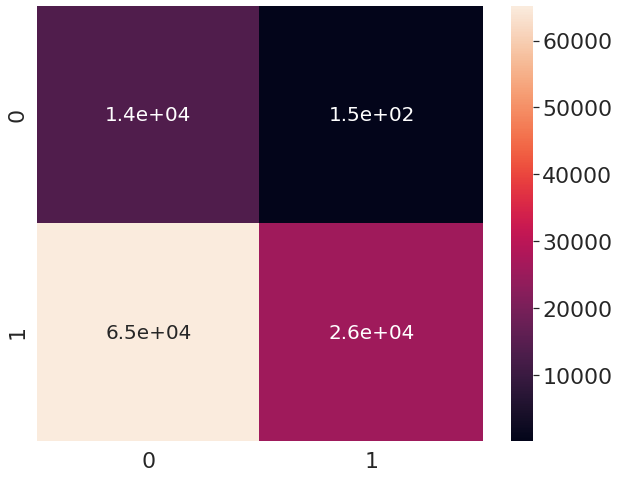

AUC score:  0.6367179563830204


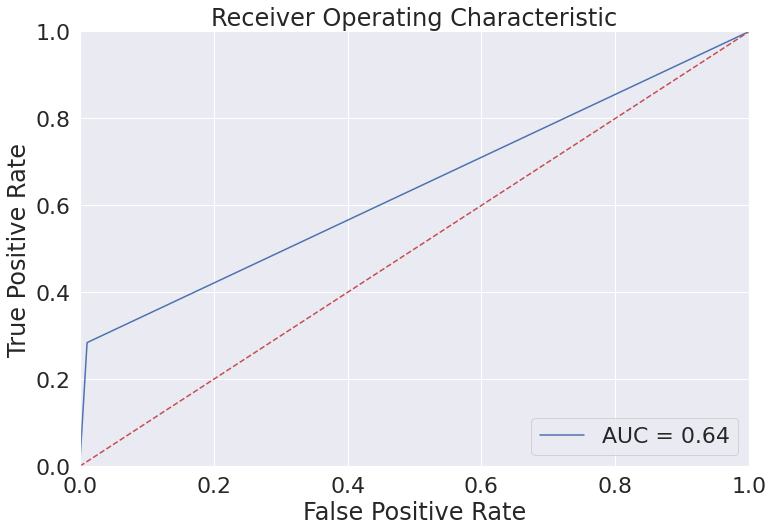

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [61]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.175     0.989     0.298     13976
           2      0.994     0.285     0.442     90967

    accuracy                          0.378    104943
   macro avg      0.585     0.637     0.370    104943
weighted avg      0.885     0.378     0.423    104943



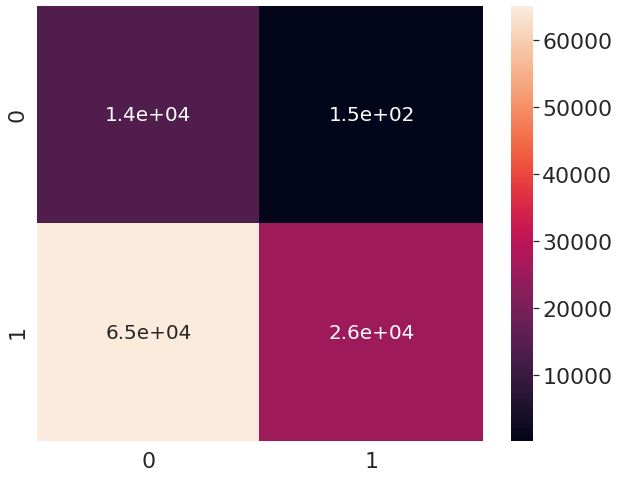

AUC score:  0.636745438876672


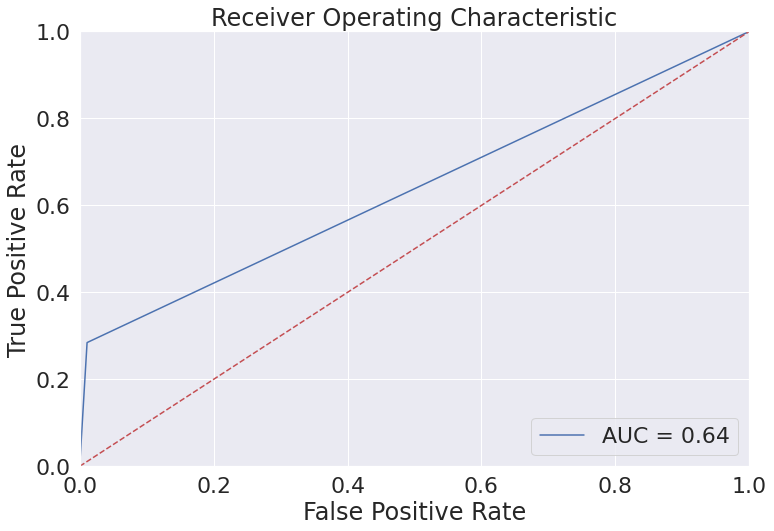

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [62]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.962     0.990     0.975      9821
           2      0.999     0.996     0.998    107744

    accuracy                          0.996    117565
   macro avg      0.980     0.993     0.987    117565
weighted avg      0.996     0.996     0.996    117565



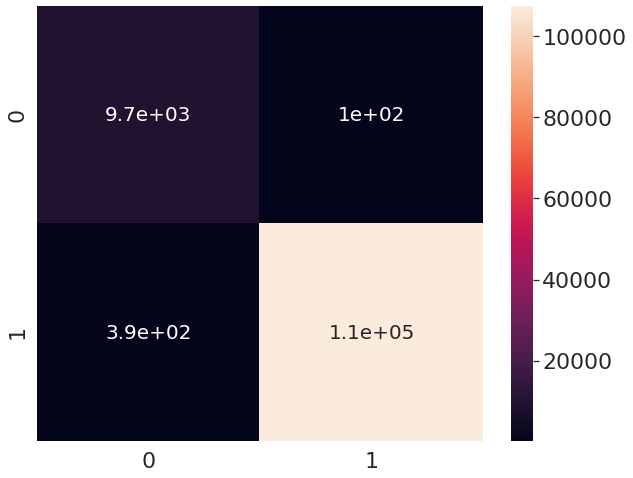

AUC score:  0.9930018411954442


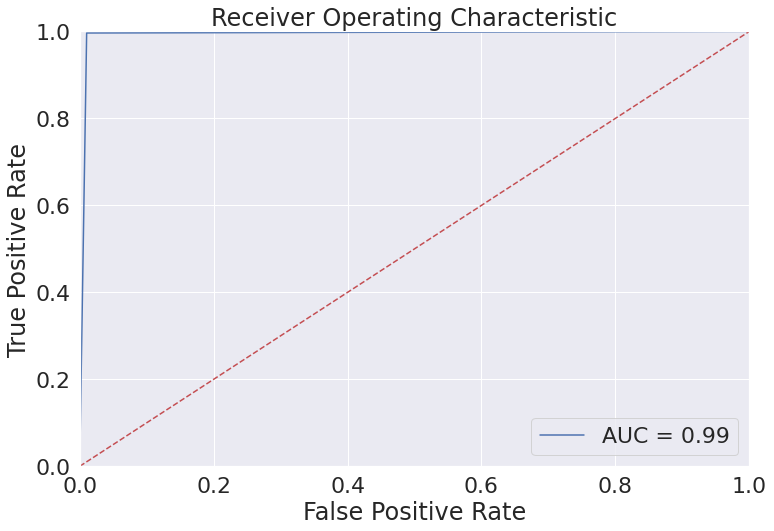

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [63]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.962     0.990     0.975      9821
           2      0.999     0.996     0.998    107744

    accuracy                          0.996    117565
   macro avg      0.980     0.993     0.987    117565
weighted avg      0.996     0.996     0.996    117565



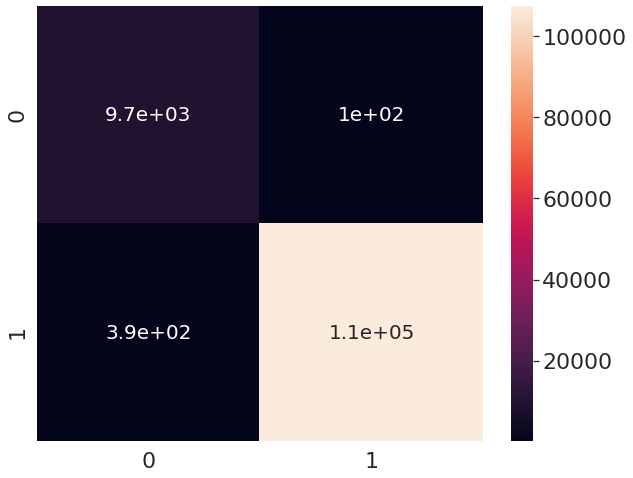

AUC score:  0.9930018411954442


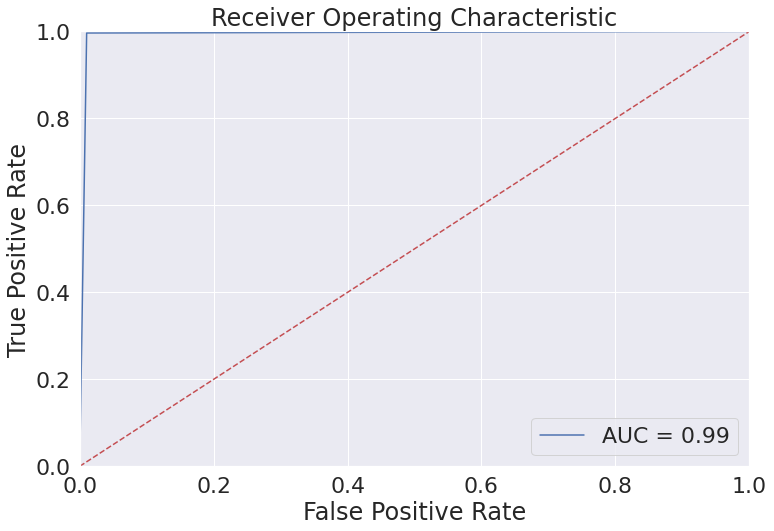

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [64]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.4. ANNEAL

### Train

In [65]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='anneal')

--------------Training and testing in the same device----------------
(65218, 115) (65218,)
------------Scale data-----------------
(65218, 115) (65218,)
X_train_scaled
[[ 3.88939801e-03  1.33696854e-01  5.40499912e-03 ...  4.72802325e-18
   1.59755553e-33  0.00000000e+00]
 [ 2.44066224e-03  1.09529463e-01  8.79147717e-04 ...  2.68685022e-18
   2.45960282e-35  1.21655120e-18]
 [ 2.34152459e-03  1.74411294e-01  3.04644720e-15 ...  1.19762703e-17
  -4.06506704e-34 -5.79818262e-18]
 ...
 [ 2.34152463e-03  1.06782433e-01  1.87917830e-08 ...  9.47687480e-19
  -5.34627495e-34  0.00000000e+00]
 [ 2.34152472e-03  1.06782452e-01  6.46943215e-08 ...  9.47687480e-19
   5.14064899e-34  0.00000000e+00]
 [ 2.34152473e-03  1.06782453e-01  6.72656323e-08 ...  5.51949851e-18
  -1.73991196e-33 -4.44645907e-17]]
---------Normalize data--------------
(65218, 115) (65218,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.753     0.992     0.856     13976
           2      0.999     0.950     0.974     90967

    accuracy                          0.956    104943
   macro avg      0.876     0.971     0.915    104943
weighted avg      0.966     0.956     0.958    104943



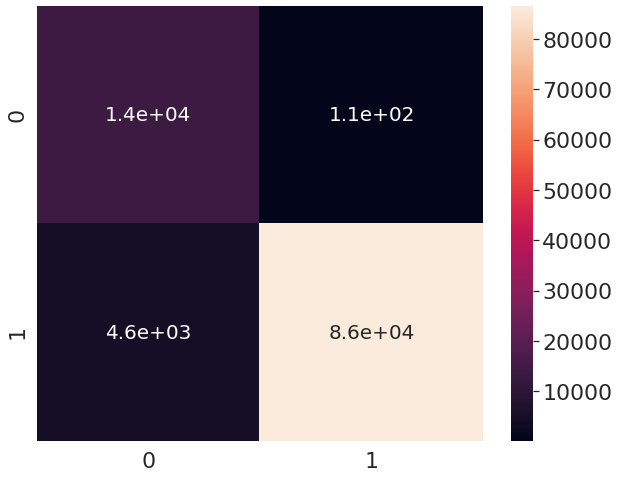

AUC score:  0.9708905246333472


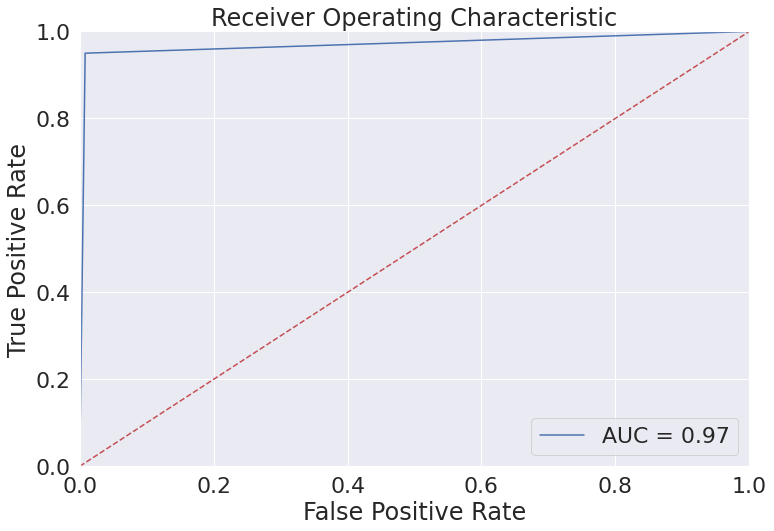

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [66]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.753     0.992     0.856     13976
           2      0.999     0.950     0.974     90967

    accuracy                          0.956    104943
   macro avg      0.876     0.971     0.915    104943
weighted avg      0.966     0.956     0.958    104943



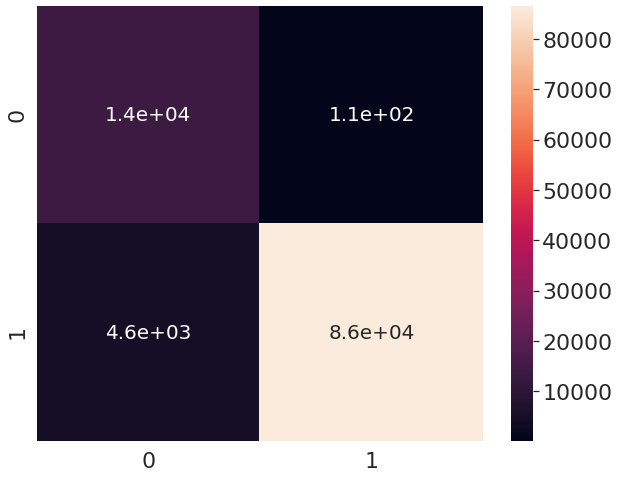

AUC score:  0.9708960211320775


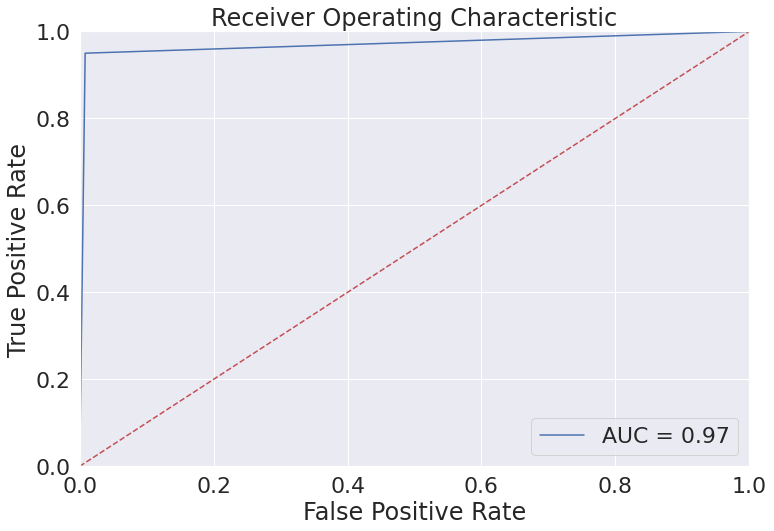

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [67]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.993     0.994      9821
           2      0.999     1.000     0.999    107744

    accuracy                          0.999    117565
   macro avg      0.998     0.996     0.997    117565
weighted avg      0.999     0.999     0.999    117565



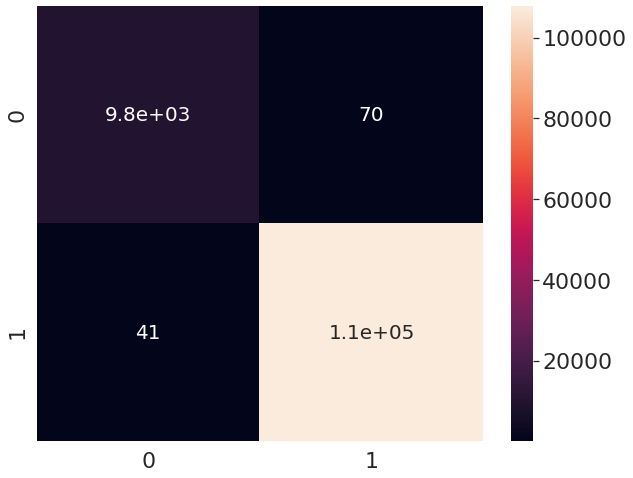

AUC score:  0.9962459423101796


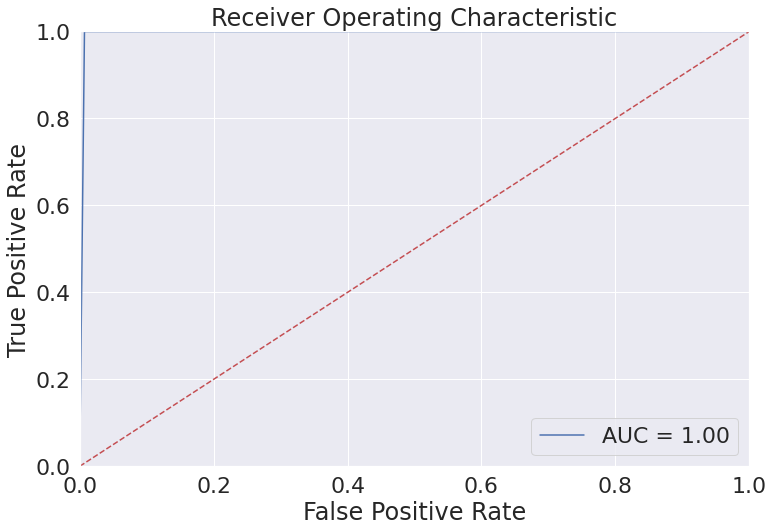

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [68]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=False)

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.993     0.995      9821
           2      0.999     1.000     1.000    107744

    accuracy                          0.999    117565
   macro avg      0.998     0.996     0.997    117565
weighted avg      0.999     0.999     0.999    117565



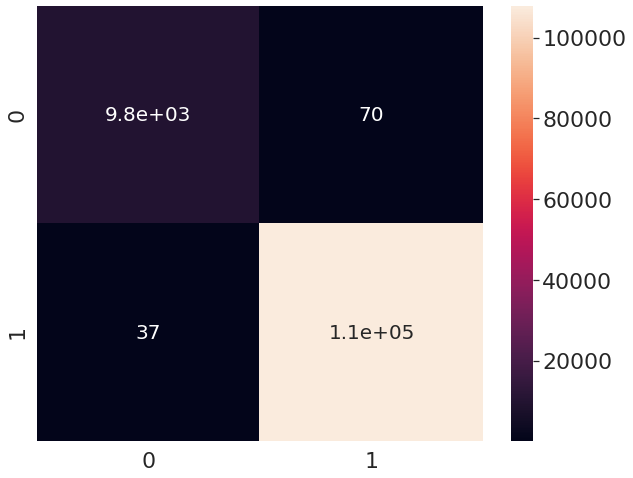

AUC score:  0.9962645048287423


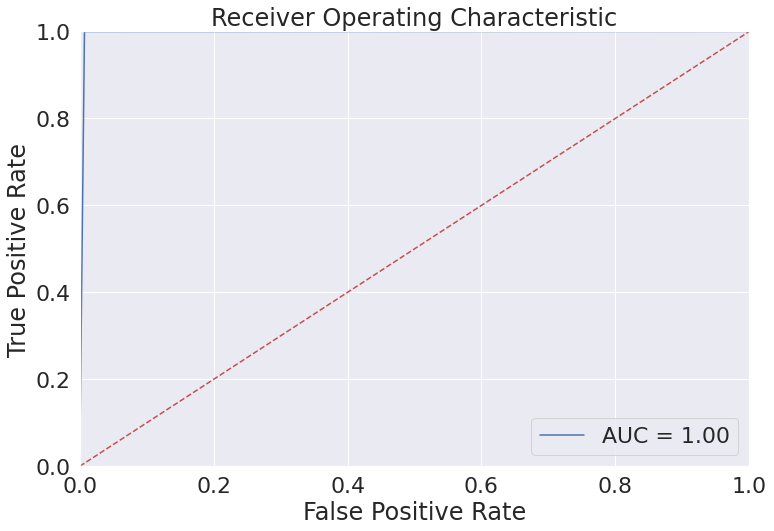

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [69]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=True)